<a href="https://colab.research.google.com/github/Susheel06/assignment1/blob/main/BigDataAnalytics_ASSIGNMENT1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split as tts
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
import requests

from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

!git clone https://github.com/Susheel06/assignment1.git

Cloning into 'assignment1'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 3 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (3/3), done.


### **Data loading and Pre-Processing using EDA**

In [14]:
# df = pd.read_csv('/content/winequality-red.csv')
df = pd.read_csv('/content/assignment1/winequality-red.csv')
train, test = tts(df, test_size = 0.3, shuffle=False)

train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


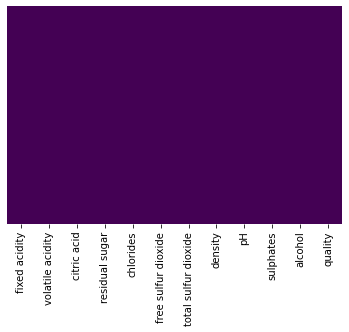

In [15]:
plt.figure()
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [16]:
train.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000
mean,8.678105,0.521649,0.295979,2.579267,0.089721,15.207328,47.179625,0.997167,3.296461,0.665532,10.334227,5.650581
std,1.795471,0.178961,0.198815,1.277500,0.048806,10.085498,34.210922,0.001853,0.156366,0.178248,1.074463,0.810473
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.400000,0.390000,0.120000,1.900000,0.072000,7.000000,22.000000,0.996200,3.190000,0.560000,9.500000,5.000000
50%,8.300000,0.510000,0.290000,2.250000,0.081000,13.000000,38.000000,0.997200,3.300000,0.620000,10.000000,6.000000
75%,9.700000,0.630000,0.470000,2.700000,0.092500,21.000000,63.000000,0.998200,3.390000,0.730000,11.000000,6.000000
max,15.900000,1.330000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003200,3.900000,2.000000,14.900000,8.000000


In [17]:
y_train = train[['quality']]
x_train = train.drop(columns = ['quality'], axis = 1)

y_test = test[['quality']]
x_test = test.drop(columns = ['quality'], axis = 1)

y_train.head()

print(x_train.shape)
print(y_train.shape)

(1119, 11)
(1119, 1)


 ### **Question 1**

In [18]:
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(x_train, y_train)

In [19]:
y_result = model.predict(x_train)
y_result = pd.DataFrame(data = model.predict(x_train), dtype=int)
y_result.head()

,0
0,5
1,5
2,5
3,5
4,5


In [20]:
from sklearn.metrics import mean_squared_error as mse
sse = mse(y_train, y_result)*y_train.shape[0]

print('Sum of squared error: %.2f' % sse)

Sum of squared error: 776.00


In [21]:
# plt.figure(figsize=(20, 10))
# plt.scatter(x_train.index, y_train, color='black')
# plt.scatter(x_train.index, y_result, color='blue')
# plt.show()

 ### **Question 2 AND Question 3**

In [22]:
y_train.loc[y_train['quality'] < 7] = 0
y_train.loc[y_train['quality'] >= 7] = 1

y_train.head()

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._seti

,quality
0,0
1,0
2,0
3,0
4,0


In [23]:
from sklearn.linear_model import LogisticRegression

model_logistic = LogisticRegression().fit(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [24]:
y_result = model_logistic.predict(x_train)
y_result = pd.DataFrame(data = model_logistic.predict(x_train), dtype=int)
y_result.head()

,0
0,0
1,0
2,0
3,0
4,0


In [25]:
print('Accuracy: %.2f' % roc_auc_score(y_train, y_result))
print('F1_Score: %.2f' % f1_score(y_train, y_result))
print('Precision: %.2f' % precision_score(y_train, y_result))
print('Recall: %.2f' % recall_score(y_train, y_result))

confus_mat = confusion_matrix(y_train, y_result)


l1 = (confus_mat[0][0])/(confus_mat[0][0] + confus_mat[0][1])
print('Sensitivity: %0.2f' % l1)

l2 = (confus_mat[1][1])/(confus_mat[1][0] + confus_mat[1][1])
print('Specificity: %0.2f' % l2)

Accuracy: 0.66
F1_Score: 0.45
Precision: 0.67
Recall: 0.34
Sensitivity: 0.97
Specificity: 0.34


In [26]:
from sklearn.linear_model import LinearRegression

model_lr_classification = LinearRegression().fit(x_train, y_train)

In [27]:
y_result = model_lr_classification.predict(x_train)
y_result = pd.DataFrame(data = model_lr_classification.predict(x_train), dtype=int)
y_result.head()

,0
0,0
1,0
2,0
3,0
4,0


In [28]:
print('Accuracy: %.2f' % roc_auc_score(y_train, y_result))
print('F1_Score: %.2f' % f1_score(y_train, y_result))
print('Precision: %.2f' % precision_score(y_train, y_result))
print('Recall: %.2f' % recall_score(y_train, y_result))

confus_mat = confusion_matrix(y_train, y_result)


l1 = (confus_mat[0][0])/(confus_mat[0][0] + confus_mat[0][1])
print('Sensitivity: %0.2f' % l1)

l2 = (confus_mat[1][1])/(confus_mat[1][0] + confus_mat[1][1])
print('Specificity: %0.2f' % l2)

Accuracy: 0.50
F1_Score: 0.00
Precision: 0.00
Recall: 0.00
Sensitivity: 1.00
Specificity: 0.00


In [29]:
from sklearn import svm

clf = svm.SVC()
clf.fit(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [30]:
y_result = clf.predict(x_train)
y_result = pd.DataFrame(data = clf.predict(x_train), dtype=int)
y_result.head()

,0
0,0
1,0
2,0
3,0
4,0


In [31]:
print('Accuracy: %.2f' % roc_auc_score(y_train, y_result))
print('F1_Score: %.2f' % f1_score(y_train, y_result))
print('Precision: %.2f' % precision_score(y_train, y_result))
print('Recall: %.2f' % recall_score(y_train, y_result))

confus_mat = confusion_matrix(y_train, y_result)


l1 = (confus_mat[0][0])/(confus_mat[0][0] + confus_mat[0][1])
print('Sensitivity: %0.2f' % l1)

l2 = (confus_mat[1][1])/(confus_mat[1][0] + confus_mat[1][1])
print('Specificity: %0.2f' % l2)

Accuracy: 0.51
F1_Score: 0.02
Precision: 1.00
Recall: 0.01
Sensitivity: 1.00
Specificity: 0.01


In [32]:
from sklearn.naive_bayes import CategoricalNB

clf_nb = CategoricalNB()
clf_nb.fit(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


CategoricalNB(alpha=1.0, class_prior=None, fit_prior=True)

In [33]:
y_result = clf_nb.predict(x_train)
y_result = pd.DataFrame(data = clf_nb.predict(x_train), dtype=int)
y_result.head()

,0
0,0
1,0
2,0
3,0
4,0


In [34]:
print('Accuracy: %.2f' % roc_auc_score(y_train, y_result))
print('F1_Score: %.2f' % f1_score(y_train, y_result))
print('Precision: %.2f' % precision_score(y_train, y_result))
print('Recall: %.2f' % recall_score(y_train, y_result))

confus_mat = confusion_matrix(y_train, y_result)


l1 = (confus_mat[0][0])/(confus_mat[0][0] + confus_mat[0][1])
print('Sensitivity: %0.2f' % l1)

l2 = (confus_mat[1][1])/(confus_mat[1][0] + confus_mat[1][1])
print('Specificity: %0.2f' % l2)

Accuracy: 0.67
F1_Score: 0.46
Precision: 0.61
Recall: 0.37
Sensitivity: 0.96
Specificity: 0.37
